# RNNで来月の航空会社の乗客数を予測する
## ～TFLearnでLSTMからGRUまで実装しよう～
https://deepage.net/deep_learning/2016/09/17/tflearn_rnn.html

In [1]:
import tflearn

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
import numpy as np
import pandas as pd
import tflearn
import matplotlib.pyplot as plt
%matplotlib inline

CSVデータ読み込み

In [3]:
df = pd.read_csv('international-airline-passengers.csv', 
                 engine='python', 
                 skipfooter=3)

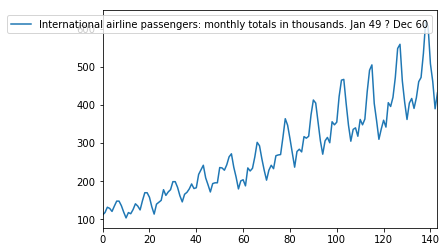

In [4]:
df.plot()

In [5]:
df2 = df.drop('Month', axis=1)

In [6]:
ds = df2.values.astype('float32')

In [7]:
ds -= np.min(np.abs(ds))
ds /= np.max(np.abs(ds))

In [8]:
def create_dataset(dataset, steps_of_history, steps_in_future):
    X, Y = [], []
    for i in range(0, len(dataset)-steps_of_history, steps_in_future):
        X.append(dataset[i:i+steps_of_history])
        Y.append(dataset[i + steps_of_history])
    X = np.reshape(np.array(X), [-1, steps_of_history, 1])
    Y = np.reshape(np.array(Y), [-1, 1])
    return X, Y

def split_data(x, y, test_size=0.1):
    pos = round(len(x) * (1 - test_size))
    trainX, trainY = x[:pos], y[:pos]
    testX, testY   = x[pos:], y[pos:]
    return trainX, trainY, testX, testY

In [9]:
# パラメータ設定
steps_of_history = 1
steps_in_future = 1
num_of_epoch = 50

In [10]:
X, Y = create_dataset(ds, steps_of_history, steps_in_future)

In [11]:
trainX, trainY, testX, testY = split_data(X, Y, 0.33)

### モデル作成

In [12]:
net = tflearn.input_data(shape=[None, steps_of_history, 1])
net = tflearn.lstm(net, n_units=6)
net = tflearn.fully_connected(net, 1, activation='linear')
net = tflearn.regression(net, optimizer='adam', learning_rate=0.001, loss='mean_square')
model = tflearn.DNN(net, tensorboard_verbose=0)
# tensorboard_dir=

### 学習の実行

In [13]:
model.fit(trainX, trainY, 
          validation_set=0.1, 
          batch_size=1, 
          n_epoch=num_of_epoch)

Training Step: 4299  | total loss: 0.00161 | time: 0.192s
| Adam | epoch: 050 | loss: 0.00161 -- iter: 85/86
Training Step: 4300  | total loss: 0.00145 | time: 1.207s
| Adam | epoch: 050 | loss: 0.00145 | val_loss: 0.00267 -- iter: 86/86
--


In [14]:
def rmse(y_pred, y_true):
    return np.sqrt(((y_true - y_pred) ** 2).mean())

In [15]:
rmse(model.predict(testX), testY)

0.097839192

In [31]:
ds.shape

(144, 1)

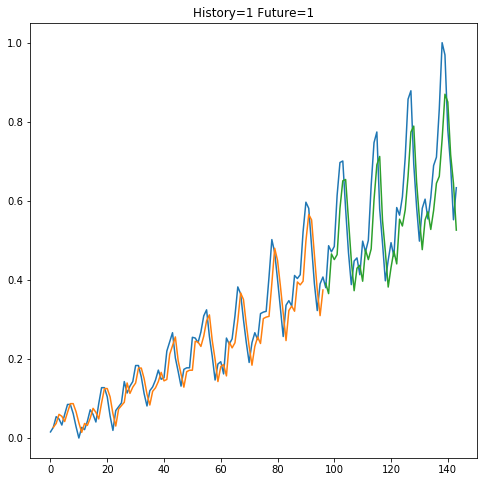

In [16]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

train_predict_plot = np.empty_like(ds)
train_predict_plot[:, :] = np.nan
train_predict_plot[steps_of_history:len(train_predict)+steps_of_history, :] = \
        train_predict

test_predict_plot = np.empty_like(ds)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+steps_of_history:len(ds), :] = \
        test_predict

plt.figure(figsize=(8, 8))
plt.title('History={} Future={}'.format(steps_of_history, steps_in_future))
plt.plot(ds)
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.savefig('passenger.png')